In [71]:
import pandas as pd
import numpy as np

In [72]:
data=pd.read_csv('C:/Users/admin/Desktop/ExcelR/Data Science ass/Simple linear regression/delivery_time.csv')

In [73]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [74]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

## Data Visualisation and EDA

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


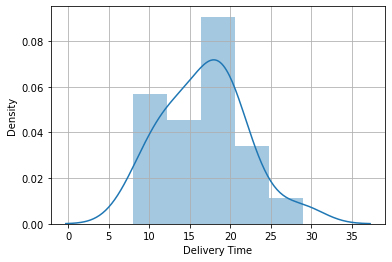

In [77]:
sns.distplot(data['Delivery Time'])
plt.grid()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


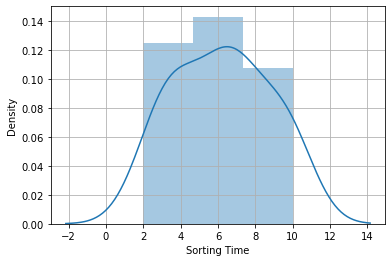

In [78]:
sns.distplot(data['Sorting Time'])
plt.grid()

In [79]:
# Renaming the columns 
Data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [80]:
Data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Correlation Analysis

In [81]:
Data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

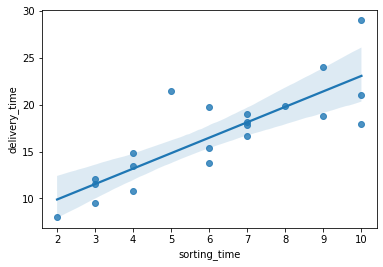

In [82]:
sns.regplot(x='sorting_time',y='delivery_time',data=Data)

## Building Model

In [83]:
import statsmodels.formula.api as smf

In [84]:
model=smf.ols("delivery_time~sorting_time",data=Data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        21:05:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Coefficient parameter
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [86]:
# p & t-value
print(model.pvalues)
print(model.tvalues)

Intercept       0.001147
sorting_time    0.000004
dtype: float64
Intercept       3.823349
sorting_time    6.387447
dtype: float64


In [87]:
# R-squared and adj.rsquared value
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Model Prediction

In [48]:
# Manual prediction for sorting time 5      #  as we use equation 'y=mx+c'
delivery_time=((6.5827)+(1.6490	)*5)

In [49]:
delivery_time

14.8277

In [66]:
# Automatic prediction
# assuming sorting time 5 and 7 
new_data=pd.Series([5,7])

In [67]:
new_data

0    5
1    7
dtype: int64

In [68]:
# Giving the column name
New_data=pd.DataFrame(new_data,columns=['sorting_time'])

In [69]:
New_data

,sorting_time
0,5
1,7


In [70]:
model.predict(New_data)

0    14.827833
1    18.125873
dtype: float64